# EXOR problem in Tensorflow

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(22)  # for reproducibility

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
Y = np.array([[0], [1], [1], [0]], dtype=np.float32)

# W = tf.Variable(tf.random.normal([2, 1]), name="weight")
# b = tf.Variable(tf.random.normal([1]), name="bias")
W = tf.Variable([[2.],[10.]])
b = tf.Variable([3.])


learning_rate = 0.1
lossHistory = []

for step in range(500):
    with tf.GradientTape() as tape:
        hypothesis = tf.sigmoid(tf.matmul(X, W) + b)
        cost = -tf.reduce_mean(Y * tf.math.log(hypothesis) + (1 - Y) * tf.math.log(1 - hypothesis))

    W_grad, b_grad = tape.gradient(cost, [W,b])  # dCost/dw, dCost/db
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    lossHistory.append(cost)

    # if step % 10 == 0: print(step, cost.numpy(), W.numpy(), b.numpy())

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

print(W, b)
print(X.shape, W.shape, Y.shape)
print("\nHypothesis: ", hypothesis.numpy(), 
      "\n Correct: ", predicted.numpy(), 
      "\n Accuracy: ", accuracy.numpy())



<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.1360611],
       [1.2548497]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-0.8371905], dtype=float32)>
(4, 2) (2, 1) (4, 1)

Hypothesis:  [[0.301448  ]
 [0.6035821 ]
 [0.33066064]
 [0.63544   ]] 
 Correct:  [[0.]
 [1.]
 [0.]
 [1.]] 
 Accuracy:  0.5


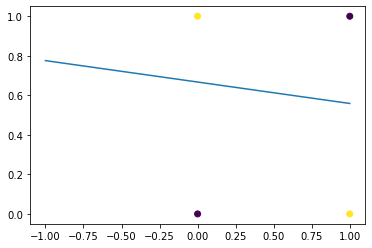

In [2]:
aa, bb, cc = W[0,0].numpy(), W[1,0].numpy(), b.numpy()
plt.scatter(X[:,0], X[:,1], c=Y)
xx = np.linspace(-1,1,20)
plt.plot(xx, -aa/bb* xx - b/bb)

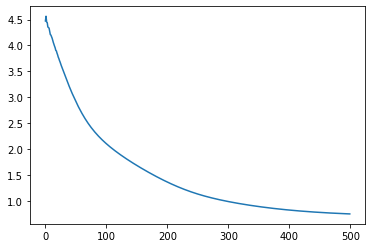

In [3]:
plt.plot(lossHistory)

# EXOR problem with Keras

In [4]:
from keras.models import Sequential
from keras.layers.core import Dense, Flatten
from keras.optimizers import SGD

X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[0]])

model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.summary()

model.compile(optimizer=SGD(learning_rate=0.1), 
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(X, Y, epochs=1000, verbose=0)
print(model.predict_proba(X))
# print([i.numpy() for i in model.weights])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Please use `model.predict()` instead.
[[0.4975699 ]
 [0.49945593]
 [0.49978137]
 [0.5016674 ]]


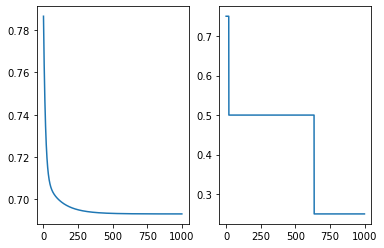

In [5]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])

# EOR problem with two layers

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________
[[0.15217933]
 [0.9494456 ]
 [0.950055  ]
 [0.04514641]]


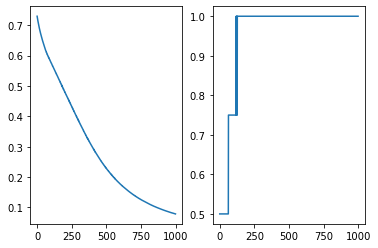

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers.core import Dense, Flatten
from keras.optimizers import SGD

X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[0]])

model = Sequential()
model.add(Dense(8, input_shape=(2,), activation='relu')) # input_shape = (dim_1, dim2, ...)
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer=SGD(learning_rate=0.01), 
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(X, Y, epochs=1000, batch_size=1, verbose=0)
print(model.predict_proba(X))

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])

# Try deep network with sigmoid

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 8)                 24        
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_15 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_17 (Dense)             (None, 8)                

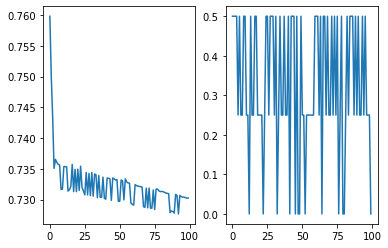

In [8]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[0]])

model = Sequential()
model.add(Dense(8, input_shape=(2,), activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer=SGD(learning_rate=0.1), 
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(X, Y, epochs=100, batch_size=1, verbose=0)
print(model.predict_proba(X))

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])

# Now, we change activation function to "relu"

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 8)                 24        
_________________________________________________________________
dense_20 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_21 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_23 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 9         
Total params: 321
Trainable params: 321
Non-trainable params: 0
________________________________________________________

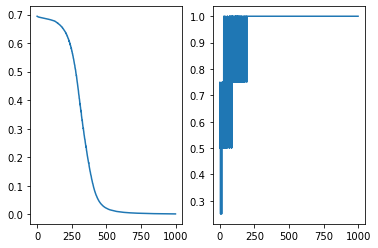

In [9]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[0]])

model = Sequential()
model.add(Dense(8, input_shape=(2,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

history = model.compile(optimizer=SGD(learning_rate=0.01), 
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(X, Y, epochs=1000, batch_size=1, verbose=0)
print(model.predict_proba(X))

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])